# Tutorial: Building geometries with PINA `DomainInterface` class

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mathLab/PINA/blob/master/tutorials/tutorial6/tutorial.ipynb)

In this tutorial we will show how to use geometries in PINA. Specifically, the tutorial will include how to create geometries and how to visualize them. The topics covered are:

* Creating CartesianDomains and EllipsoidDomains
* Getting the Union and Difference of Geometries
* Sampling points in the domain (and visualize them)

We import the relevant modules first.

In [1]:
## routine needed to run the notebook on Google Colab
try:
    import google.colab

    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    !pip install "pina-mathlab"

import torch
import matplotlib.pyplot as plt

from pina import LabelTensor
from pina.domain import (
    EllipsoidDomain,
    Difference,
    CartesianDomain,
    Union,
    SimplexDomain,
    DomainInterface,
)

# a simple plotting function
def plot_scatter(ax, pts, title):
    ax.title.set_text(title)
    ax.scatter(pts.extract("x"), pts.extract("y"), color="blue", alpha=0.5)

## Built-in Geometries

We will create one cartesian and two ellipsoids. For the sake of simplicity, we show here the 2-dimensional case, but the extension to 3D (and higher) cases is trivial. The geometries allow also the generation of samples belonging to the boundary. So, we will create one ellipsoid with the border and one without.

In [2]:
cartesian = CartesianDomain({"x": [0, 2], "y": [0, 2]})
ellipsoid_no_border = EllipsoidDomain({"x": [1, 3], "y": [1, 3]})
ellipsoid_border = EllipsoidDomain(
    {"x": [2, 4], "y": [2, 4]}, sample_surface=True
)

The `{'x': [0, 2], 'y': [0, 2]}` are the bounds of the `CartesianDomain` being created. 

To visualize these shapes, we need to sample points on them. We will use the `sample` method of the `CartesianDomain` and `EllipsoidDomain` classes. This method takes a `n` argument which is the number of points to sample. It also takes different modes to sample, such as `'random'`.

In [3]:
cartesian_samples = cartesian.sample(n=1000, mode="random")
ellipsoid_no_border_samples = ellipsoid_no_border.sample(n=1000, mode="random")
ellipsoid_border_samples = ellipsoid_border.sample(n=1000, mode="random")

We can see the samples of each geometry to see what we are working with.

In [4]:
print(f"Cartesian Samples: {cartesian_samples}")
print(f"Ellipsoid No Border Samples: {ellipsoid_no_border_samples}")
print(f"Ellipsoid Border Samples: {ellipsoid_border_samples}")

Cartesian Samples: 1: {'dof': ['x', 'y'], 'name': 1}

tensor([[1.6544, 1.2960],
        [1.7501, 0.2478],
        [1.0246, 1.3413],
        ...,
        [0.4893, 0.9506],
        [0.8948, 0.0721],
        [0.9561, 1.5479]])
Ellipsoid No Border Samples: 1: {'dof': ['x', 'y'], 'name': 1}

tensor([[2.6485, 2.2025],
        [2.1400, 1.9427],
        [1.7750, 1.8902],
        ...,
        [2.0498, 1.9918],
        [1.9361, 1.9551],
        [1.4225, 1.4052]])
Ellipsoid Border Samples: 1: {'dof': ['x', 'y'], 'name': 1}

tensor([[3.9522, 3.3056],
        [3.3107, 2.0495],
        [3.8294, 3.5586],
        ...,
        [2.0069, 3.1172],
        [2.2859, 3.7001],
        [2.4795, 2.1462]])


We are now ready to visualize the samples using matplotlib.

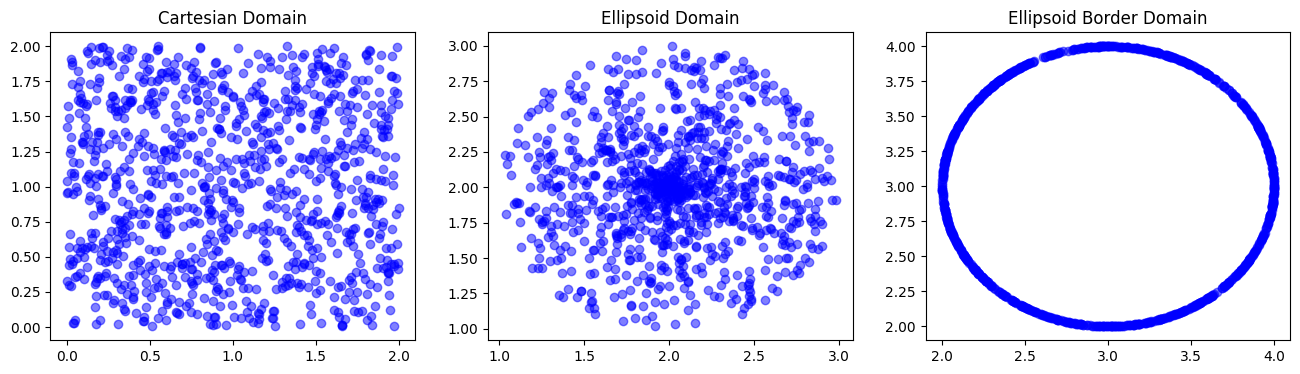

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
pts_list = [
    cartesian_samples,
    ellipsoid_no_border_samples,
    ellipsoid_border_samples,
]
title_list = ["Cartesian Domain", "Ellipsoid Domain", "Ellipsoid Border Domain"]
for ax, pts, title in zip(axs, pts_list, title_list):
    plot_scatter(ax, pts, title)

We have now created, sampled, and visualized our first geometries! We can see that the `EllipsoidDomain` with the border has a border around it. We can also see that the `EllipsoidDomain` without the border is just the ellipse. We can also see that the `CartesianDomain` is just a square.

### Simplex Domain

Among the built-in shapes, we quickly show here the usage of `SimplexDomain`, which can be used for polygonal domains!

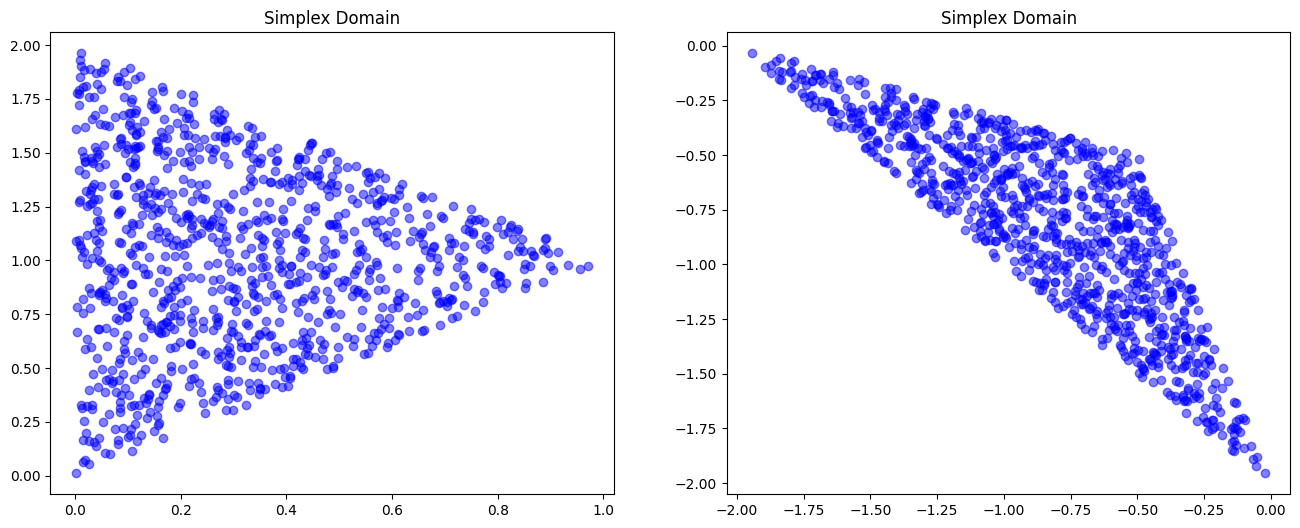

In [6]:
import torch

spatial_domain = SimplexDomain(
    [
        LabelTensor(torch.tensor([[0, 0]]), labels=["x", "y"]),
        LabelTensor(torch.tensor([[1, 1]]), labels=["x", "y"]),
        LabelTensor(torch.tensor([[0, 2]]), labels=["x", "y"]),
    ]
)

spatial_domain2 = SimplexDomain(
    [
        LabelTensor(torch.tensor([[0.0, -2.0]]), labels=["x", "y"]),
        LabelTensor(torch.tensor([[-0.5, -0.5]]), labels=["x", "y"]),
        LabelTensor(torch.tensor([[-2.0, 0.0]]), labels=["x", "y"]),
    ]
)

pts = spatial_domain2.sample(100)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for domain, ax in zip([spatial_domain, spatial_domain2], axs):
    pts = domain.sample(1000)
    plot_scatter(ax, pts, "Simplex Domain")

## Boolean Operations

To create complex shapes we can use the boolean operations, for example to merge two default geometries. We need to simply use the `Union` class: it takes a list of geometries and returns the union of them.

Let's create three unions. Firstly, it will be a union of `cartesian` and `ellipsoid_no_border`. Next, it will be a union of `ellipse_no_border` and `ellipse_border`. Lastly, it will be a union of all three geometries.

In [7]:
cart_ellipse_nb_union = Union([cartesian, ellipsoid_no_border])
cart_ellipse_b_union = Union([cartesian, ellipsoid_border])
three_domain_union = Union([cartesian, ellipsoid_no_border, ellipsoid_border])

We can of course sample points over the new geometries, by using the `sample` method as before. We highlight that the available sample strategy here is only *random*.

In [8]:
c_e_nb_u_points = cart_ellipse_nb_union.sample(n=2000, mode="random")
c_e_b_u_points = cart_ellipse_b_union.sample(n=2000, mode="random")
three_domain_union_points = three_domain_union.sample(n=3000, mode="random")

We can plot the samples of each of the unions to see what we are working with.

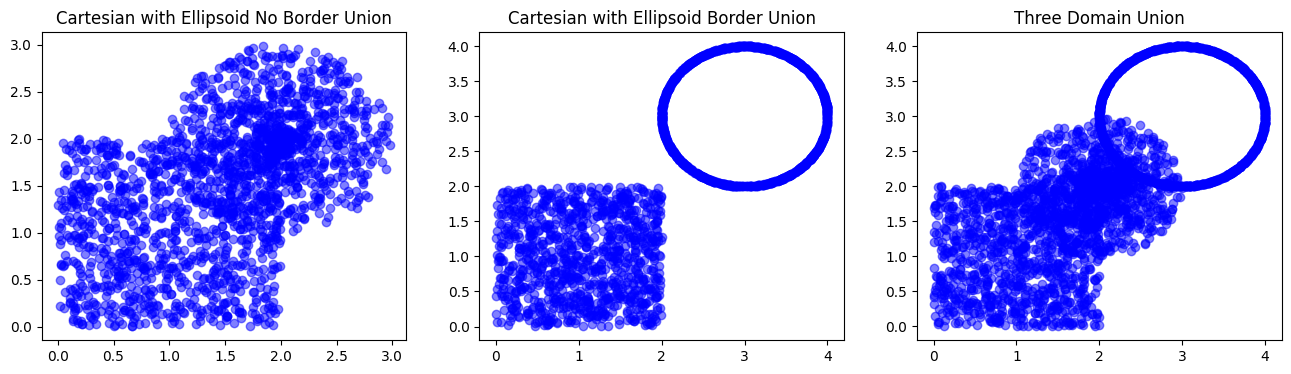

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
pts_list = [c_e_nb_u_points, c_e_b_u_points, three_domain_union_points]
title_list = [
    "Cartesian with Ellipsoid No Border Union",
    "Cartesian with Ellipsoid Border Union",
    "Three Domain Union",
]
for ax, pts, title in zip(axs, pts_list, title_list):
    plot_scatter(ax, pts, title)

Now, we will find the differences of the geometries. We will find the difference of `cartesian` and `ellipsoid_no_border`.

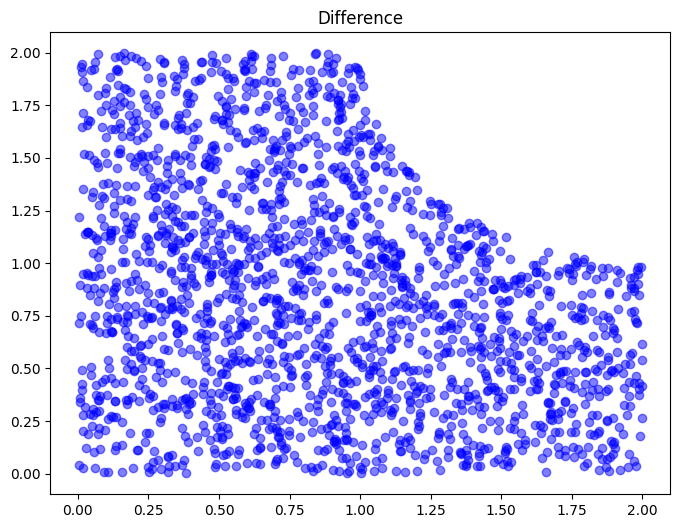

In [10]:
cart_ellipse_nb_difference = Difference([cartesian, ellipsoid_no_border])
c_e_nb_d_points = cart_ellipse_nb_difference.sample(n=2000, mode="random")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_scatter(ax, c_e_nb_d_points, "Difference")

## Create Custom DomainInterface

We will take a look on how to create our own geometry. The one we will try to make is a heart defined by the function $$(x^2+y^2-1)^3-x^2y^3 \le 0$$

In [11]:
class Heart(DomainInterface):
    """Implementation of the Heart Domain."""

    def __init__(self, sample_border=False):
        super().__init__()

Because the `DomainInterface` class we are inheriting from requires both a `sample` method and `is_inside` method, we will create them and just add in "pass" for the moment. We also observe that the methods `sample_modes` and `variables` of the `DomainInterface` class are initialized as `abstractmethod`, so we need to redefine them both in the subclass `Heart` .

In [12]:
class Heart(DomainInterface):
    """Implementation of the Heart Domain."""

    def __init__(self, sample_border=False):
        super().__init__()

    def is_inside(self):
        pass

    def sample(self):
        pass

    @property
    def sample_modes(self):
        pass

    @property
    def variables(self):
        pass

Now we have the skeleton for our `Heart` class.  Also the `sample` method is where most of the work is done so let's fill it out. 

In [13]:
class Heart(DomainInterface):
    """Implementation of the Heart Domain."""

    def __init__(self, sample_border=False):
        super().__init__()

    def is_inside(self):
        pass

    def sample(self, n):
        sampled_points = []

        while len(sampled_points) < n:
            x = torch.rand(1) * 3.0 - 1.5
            y = torch.rand(1) * 3.0 - 1.5
            if ((x**2 + y**2 - 1) ** 3 - (x**2) * (y**3)) <= 0:
                sampled_points.append([x.item(), y.item()])

        return LabelTensor(torch.tensor(sampled_points), labels=["x", "y"])

    @property
    def sample_modes(self):
        pass

    @property
    def variables(self):
        pass

To create the Heart geometry we simply run:

In [14]:
heart = Heart()

To sample from the Heart geometry we simply run:

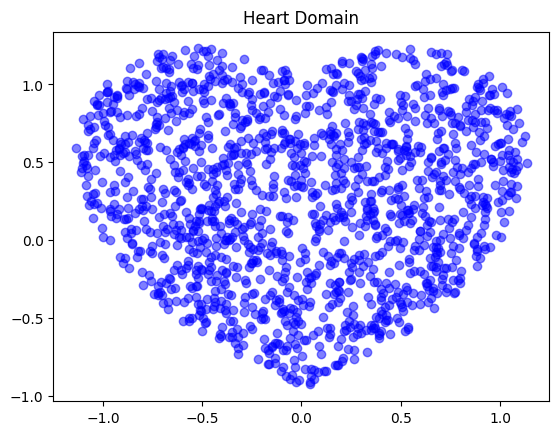

In [15]:
pts_heart = heart.sample(1500)

fig, ax = plt.subplots()
plot_scatter(ax, pts_heart, "Heart Domain")

## What's Next?

We have walked through a simple tutorial on how to build custom geometries and use domain operations to compose base geometries. Now you can experiment with different geometries and create your own!

1. **Experiment with Complex Geometries**: Combine multiple basic shapes to create more intricate structures using domain operations.

2. **Optimize Geometry for Specific Tasks**: Customize your geometry models for specialized applications such as fluid dynamics, heat transfer, or structural analysis.

3. **...and many more!**: Explore new geometries and build them with `DomainInterface`!

For more resources and tutorials, check out the [PINA Documentation](https://mathlab.github.io/PINA/).